In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
control_group = pd.read_csv("control_group.csv", delimiter=";")
test_group = pd.read_csv("test_group.csv", delimiter=";")

In [27]:
control_group.head(3)


,Campaign Name,Date,Spend-USD,# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [28]:
test_group.head(3)

,Campaign Name,Date,Spend-USD,# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578


In [11]:
def explore_dataset(input_df):
    dup = input_df[input_df.duplicated() == True].shape[0] > 0 #Computing if any rows are duplicated
    missing = input_df.isnull().sum() #Missing values in each
    fields = input_df.columns #fields in the dataset
    print("Duplication: {}\n\nMissing data per field: \n{}".format(dup, missing))
    print("\nStatistics: \n{}".format(input_df[fields].describe())) # Information about columns
    input_df.info()

In [22]:
explore_dataset(control_group)
explore_dataset(test_group)

Duplication: False

Missing data per field: 
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

Statistics: 
                                Date  Spend [USD]  # of Impressions  \
count                             29    29.000000         29.000000   
mean   2019-08-15 20:41:22.758620672  2304.068966     109559.758621   
min              2019-08-01 00:00:00  1757.000000      71274.000000   
25%              2019-08-09 00:00:00  1962.000000      92029.000000   
50%              2019-08-16 00:00:00  2319.000000     113430.000000   
75%              2019-08-23 00:00:00  2544.000000     121332.000000   
max              2019-08-30 00:00:00  3083.000000     145248.000000   
std                              NaN   363.534822      21688.922908   

               Reach  # of Website Cli

In [37]:
control_group = control_group.dropna()

In [20]:
#Change type of date from object to datetime
control_group['Date'] = pd.to_datetime(control_group['Date'], format="%d.%m.%Y")

In [21]:
test_group['Date'] = pd.to_datetime(test_group['Date'], format="%d.%m.%Y")

In [18]:
control_group = control_group.rename(columns = {"Spend [USD]" : "Spend-USD"})
test_group = test_group.rename(columns = {"Spend [USD]" : "Spend-USD"})

In [30]:
#For every dollar spent, what are my returns for Control vs Test group
print(control_group["# of Impressions"].sum()/control_group["Spend-USD"].sum())
print(test_group["# of Impressions"].sum()/test_group["Spend-USD"].sum())

47.55055523960609
29.099828330645582


In [8]:
def barchart(x_axis, y_axis, x_label="X-AXIS", y_label="Y-AXIS", title = "Bar Chart"):
    plt.bar(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    #ax1.set_xlabel(x_label)
    #ax1.set_ylabel(y_label)
    #ax1.set_title(title, size=15)

Following calculations show, for every dollar spent, what was the return from Control group Vs Test group for every field

Field: # of Impressions


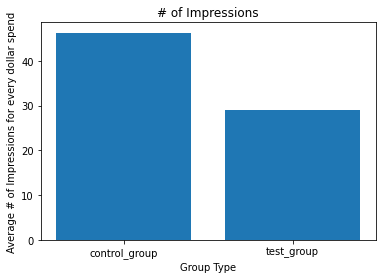

Field: Reach


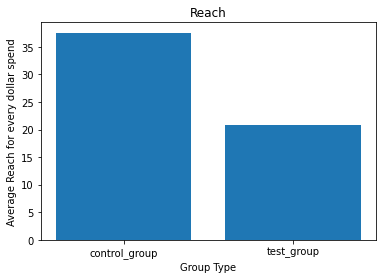

Field: # of Website Clicks


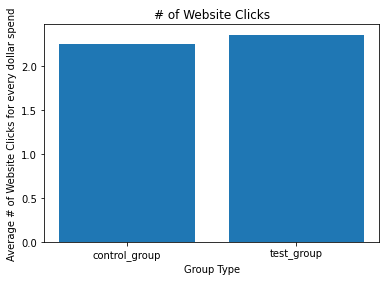

Field: # of Searches


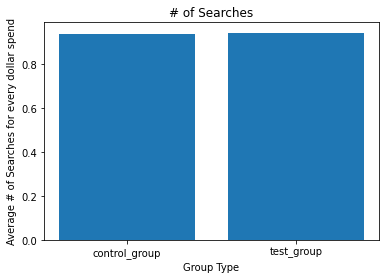

Field: # of View Content


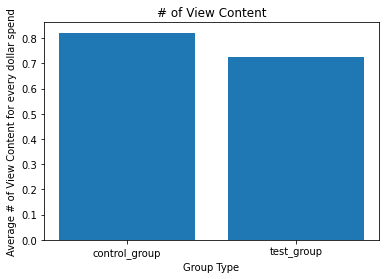

Field: # of Add to Cart


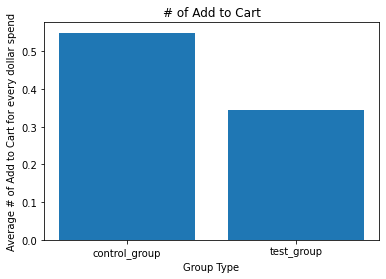

Field: # of Purchase


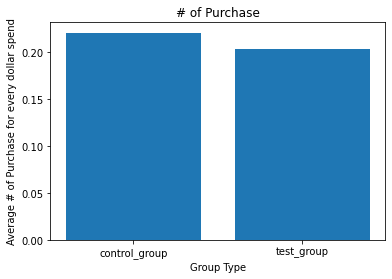

In [9]:
columns_to_monitor = ['# of Impressions', 'Reach','# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']
print("Following calculations show, for every dollar spent, what was the return from Control group Vs Test group for every field\n")
for col in columns_to_monitor:
    print("Field: %s" %col)
    x_axis = ["control_group", "test_group"]
    y_axis =[(control_group[col].sum())/control_group["Spend-USD"].sum() , (test_group[col].sum())/test_group["Spend-USD"].sum()]
    x_label = "Group Type"
    y_label = "Average " +col+ " for every dollar spend"
    title = col
    barchart(x_axis, y_axis, x_label, y_label, title)

In [38]:
control_group["conversion_rate"] = control_group["# of Purchase"]/control_group["# of Website Clicks"]
test_group["conversion_rate"] = test_group["# of Purchase"]/test_group["# of Website Clicks"]

control_group["Investment_per_purchase"] = control_group["Spend-USD"]/control_group["# of Purchase"]
test_group["Investment_per_purchase"] = test_group["Spend-USD"]/test_group["# of Purchase"]

control_group["Reach_per_purchase"] = control_group["Reach"]/control_group["# of Purchase"]
test_group["Reach_per_purchase"] = test_group["Reach"]/test_group["# of Purchase"]

We have calculated 3 metrics conversion_rate, Investment_per_purchase, Reach_per_purchase

In [20]:
control_group.head(1)

,Campaign Name,Date,Spend-USD,# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,conversion_rate,Investment_per_purchase,Reach_per_purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.088084,3.68932,92.119741


In [48]:
#We need to find if these 3 values are continuous or categorical
def draw_histogram(list_of_values, bins, title):
    plt.hist(list_of_values, bins)
    plt.title(title)
    plt.show()

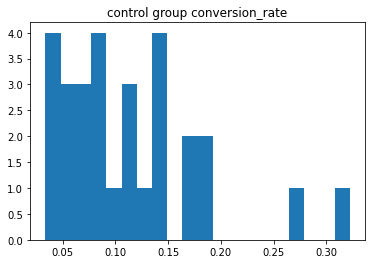

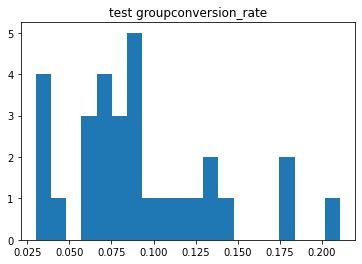

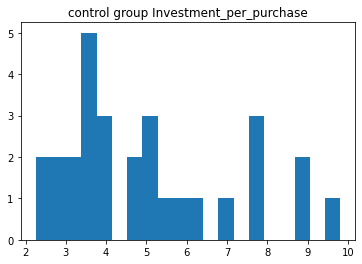

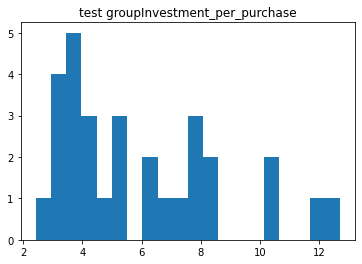

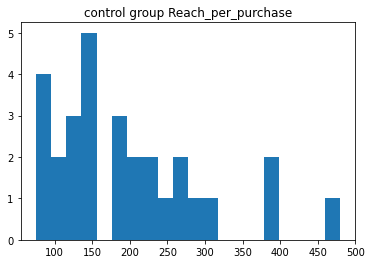

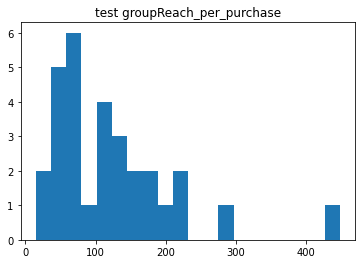

In [51]:
metrics = ["conversion_rate", "Investment_per_purchase", "Reach_per_purchase"]
for metric in metrics: 
    title = "control group "+ metric 
    draw_histogram(control_group[metric].to_list(), 20, title)
    title = "test group " + metric
    draw_histogram(test_group[metric].to_list(), 20, title)

In [29]:
from scipy.stats import mannwhitneyu

In [54]:
#All the metrics are non-normal and continuous, hence we can take Mann and Whitney U test for hypothesis testing
metrics = ["conversion_rate", "Investment_per_purchase", "Reach_per_purchase"]
for metric in metrics:
    stat, p_value = mannwhitneyu(control_group[metric].to_list(),test_group[metric].to_list(), alternative="greater")
    print('Statistics=%.2f, p=%.4f' % (stat, p_value)) 
    # Level of significance 
    alpha = 0.05
    # conclusion 
    if p_value < alpha: 
        print('Reject Null Hypothesis (Significant difference between two samples in %s)' %metric) 
    else: 
        print('Do not Reject Null Hypothesis (No significant difference between two samples in %s)\n' %metric)

Statistics=503.00, p=0.1531
Do not Reject Null Hypothesis (No significant difference between two samples in conversion_rate)

Statistics=362.00, p=0.8674
Do not Reject Null Hypothesis (No significant difference between two samples in Investment_per_purchase)

Statistics=652.00, p=0.0005
Reject Null Hypothesis (Significant difference between two samples in Reach_per_purchase)


In [55]:
print(control_group["Reach_per_purchase"].median())
print(test_group["Reach_per_purchase"].median())

180.10294117647058
105.50260472712081


Specifically, the test group required significantly fewer reaches per purchase, indicating improved efficiency in # of Reach.

Conclusion: The test_group did not statistically show a significant change towards the # of Purchases(Monetory Value). So if this Test Variation was to drive up the monetory value, statistically there is not enough evidence to support it. 